実際にはLSTM層かGRU層を用いることになる。<br>
LSTM層は勾配消失問題に関する研究の集大成として1997年に発表された。<br>

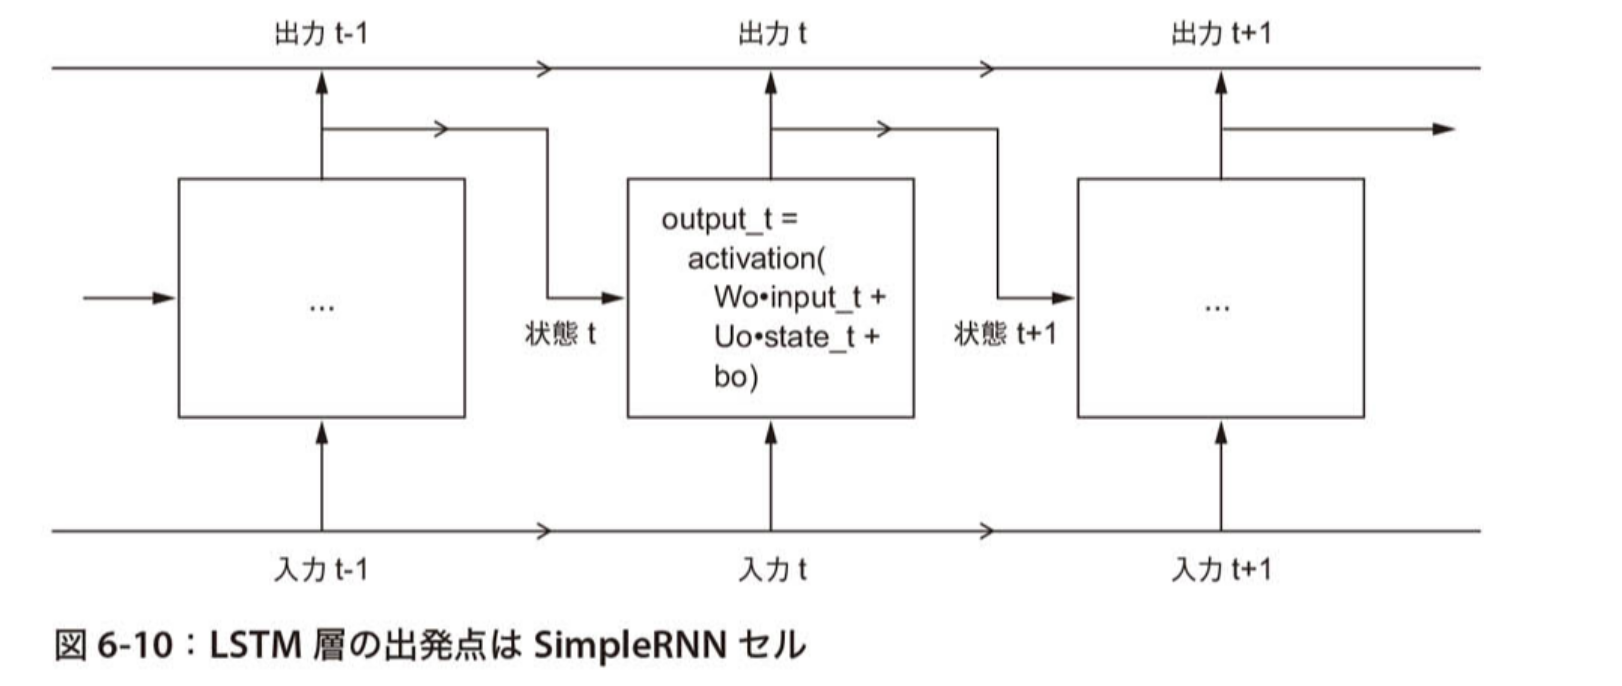

In [2]:
# 画像の表示
from IPython.display import Image
Image(filename='03.png', width=600)

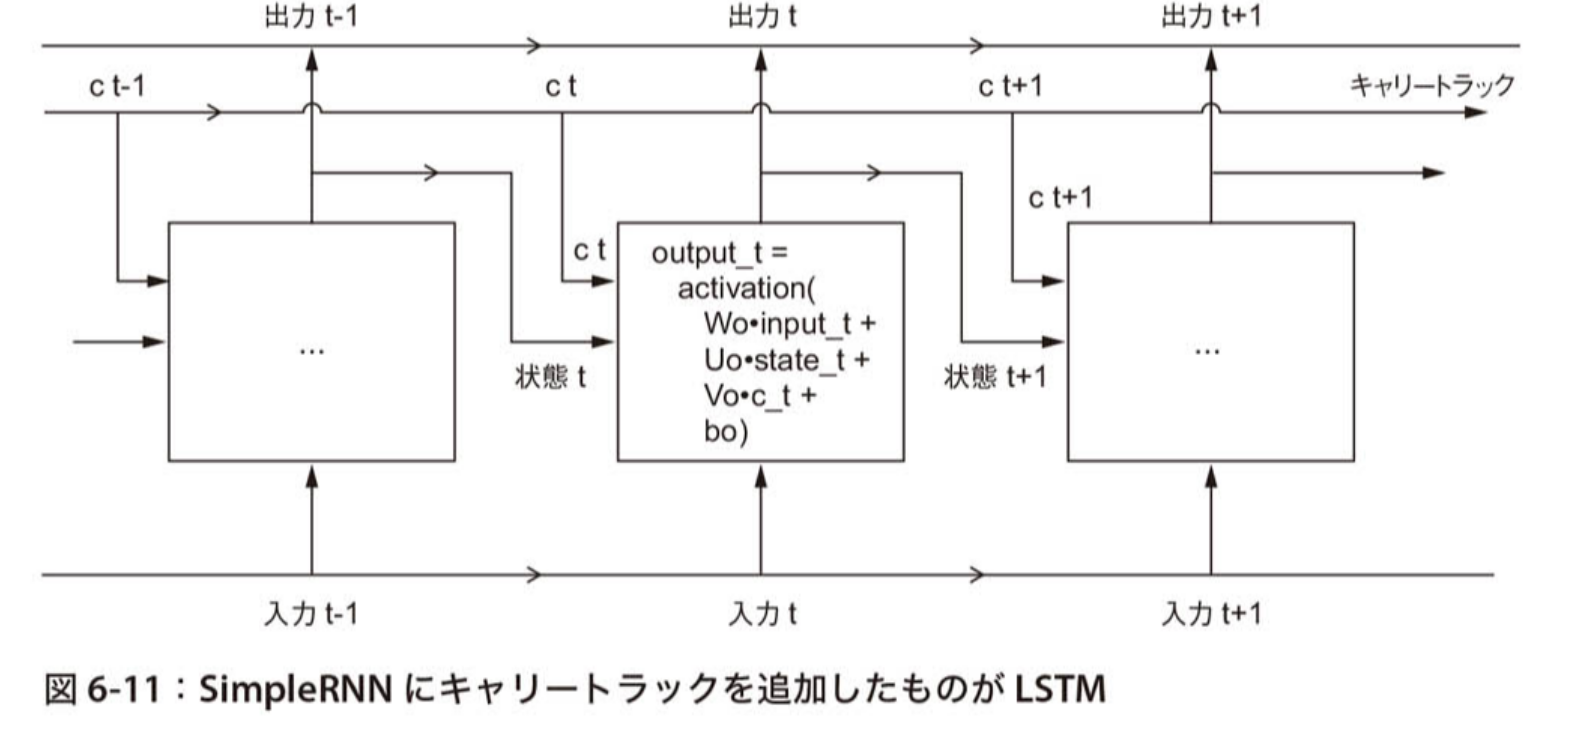

In [3]:
# 画像の表示
from IPython.display import Image
Image(filename='04.png', width=600)

ここで注意するのは、キャリートラックの次の値を計算する方法。<br>
この計算には、３つの異なる変換が必要。<br>
これらの変換は「すべてSimpleRNNセルの形式」をとる。<br>

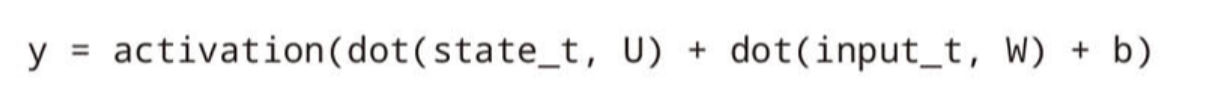

In [5]:
# 画像の表示
from IPython.display import Image
Image(filename='05.png', width=400)

ここで重み行列が別々に３つ存在するので、文字i, f, kを付けて区別する。<br>

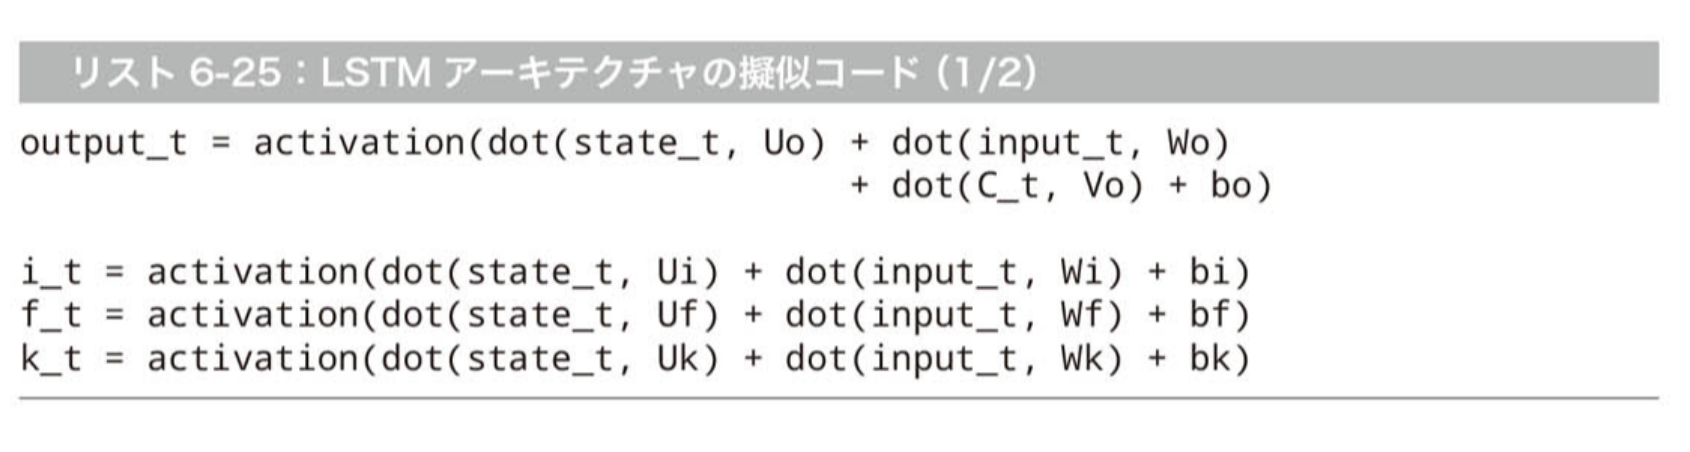

In [7]:
# 画像の表示
from IPython.display import Image
Image(filename='06.png', width=600)

i_t, f_t, k_tを組み合わせると、新しいキャリー状態が得られる。<br>

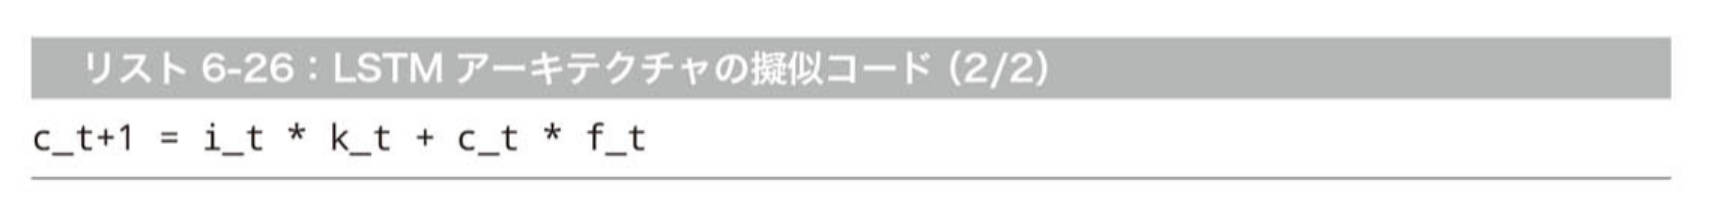

In [8]:
# 画像の表示
from IPython.display import Image
Image(filename='07.png', width=600)

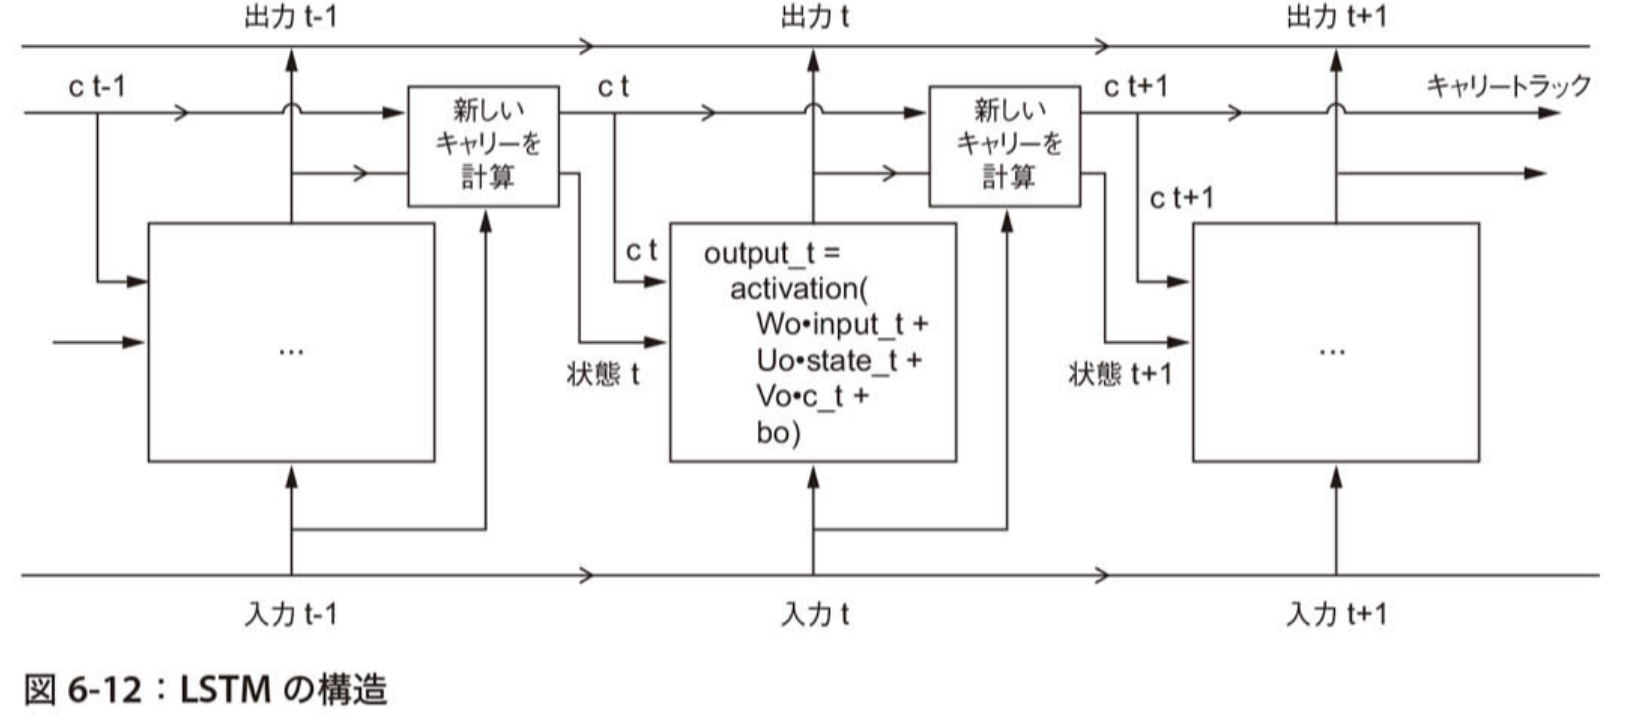

In [12]:
# 画像の表示
from IPython.display import Image
Image(filename='08.png', width=700)

これらの演算が実際に何を行うかは、それらをパラメータ化する重みの内容によって決まる。<br>
LSTMセルは、過去の情報を後から再注入できるようにすることで、勾配消失問題に対処できる。<br>

### KerasでのLSTMの具体的な例

In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 特徴量として考慮する単語の数
max_len = 500 # この数の単語を残してテキストをカット
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) =\
    imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences(sample × times)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences(sample × times)
input_train shape: (25000, 500)
input_test shape (25000, 500)


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32)) # 出力の次元を設定
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.4973 - acc: 0.7685 - val_loss: 0.3578 - val_acc: 0.8526
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2961 - acc: 0.8840 - val_loss: 0.3184 - val_acc: 0.8650
Epoch 3/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2356 - acc: 0.9105 - val_loss: 0.2880 - val_acc: 0.8814
Epoch 4/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2014 - acc: 0.9257 - val_loss: 0.2990 - val_acc: 0.8814
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1744 - acc: 0.9355 - val_loss: 0.3154 - val_acc: 0.8844
Epoch 6/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1624 - acc: 0.9429 - val_loss: 0.3078 - val_acc: 0.8684
Epoch 7/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1442 - acc: 0.9498 - val_loss: 0.3154 - val_acc:

<Figure size 432x288 with 0 Axes>

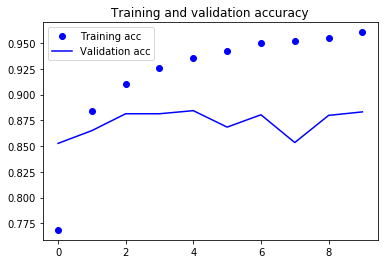

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

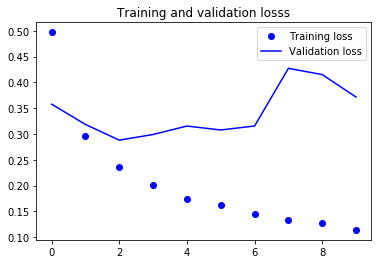

In [18]:
# 損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losss')
plt.legend()